In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from fig_utils import *

import sys
sys.path.append('../')
from scluster import SpectralClustering
from kkmeans import KKernelClustering, k_polynomial, k_tanh, k_gaussian

In [4]:
# PARAMS
n_samples = 1500
seed_val = 0

In [5]:
# make the datasets
np.random.seed(seed_val)
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

In [18]:
# perform the clustering
print("Spectral Clustering...")
sc = SpectralClustering(2, 100, lambda x,y: k_gaussian(x, y, .1))
sc_moon_labels = sc.train(noisy_moons[0])

Spectral Clustering...


In [19]:
sc_circle_labels = sc.train(noisy_circles[0])

In [14]:
sc = SpectralClustering(3, 100, lambda x,y: k_gaussian(x, y, .5))
sc_blob_labels = sc.train(blobs[0])

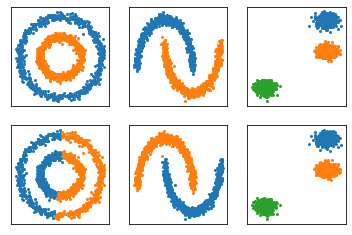

In [20]:
# plot the data
fig, ax = plt.subplots(2, 3)
ax_plot_clusters(ax[0][0], *noisy_circles, s=4)
ax_plot_clusters(ax[0][1], *noisy_moons, s=4)
ax_plot_clusters(ax[0][2], *blobs, s=4)
ax_plot_clusters(ax[1][0], noisy_circles[0], sc_circle_labels, s=4)
ax_plot_clusters(ax[1][1], noisy_moons[0], sc_moon_labels, s=4)
ax_plot_clusters(ax[1][2], blobs[0], sc_blob_labels, s=4)
plt.setp(ax, xticks=[], yticks=[])
plt.show()